In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import sys
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, Y_class_train), (X_test,Y_class_test)=mnist.load_data()
print("학습셋 이미지수: %d개" %(X_train.shape[0]))
print("테스트셋 이미지수: %d개" %(X_test.shape[0]))


학습셋 이미지수: 60000개
테스트셋 이미지수: 10000개


In [3]:
print(X_train.shape)
#60000개의 이미지, 28x28 pixel의 이미지

(60000, 28, 28)


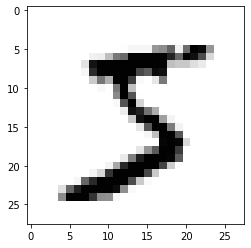

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
for x in X_train[0]:
    for i in x: 
        sys.stdout.write('%d\t' %i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [6]:
X_train=X_train.reshape(X_train.shape[0], 784)
X_train=X_train.astype(float)
X_train=X_train/255

X_test=X_test.reshape(X_test.shape[0], -1)
X_test=X_test.astype(float)
X_test=X_test/255

In [7]:
print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [8]:
print("target: %d" % (Y_class_train[0]))

target: 5


In [9]:
Y_train=to_categorical(Y_class_train, 10)
Y_test=to_categorical(Y_class_test,10)

In [10]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
model=Sequential()
model.add(Dense(512,input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
MODEL_DIR='model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath='model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpoint=ModelCheckpoint(filepath=modelpath,monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback=EarlyStopping(monitor='val_loss', patience=10)

In [14]:
history=model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpoint])


Epoch 00001: val_loss improved from inf to 0.15222, saving model to model\01-0.1522.hdf5

Epoch 00002: val_loss improved from 0.15222 to 0.10360, saving model to model\02-0.1036.hdf5

Epoch 00003: val_loss improved from 0.10360 to 0.08678, saving model to model\03-0.0868.hdf5

Epoch 00004: val_loss improved from 0.08678 to 0.07461, saving model to model\04-0.0746.hdf5

Epoch 00005: val_loss improved from 0.07461 to 0.07164, saving model to model\05-0.0716.hdf5

Epoch 00006: val_loss improved from 0.07164 to 0.06005, saving model to model\06-0.0601.hdf5

Epoch 00007: val_loss did not improve from 0.06005

Epoch 00008: val_loss did not improve from 0.06005

Epoch 00009: val_loss did not improve from 0.06005

Epoch 00010: val_loss did not improve from 0.06005

Epoch 00011: val_loss did not improve from 0.06005

Epoch 00012: val_loss improved from 0.06005 to 0.05994, saving model to model\12-0.0599.hdf5

Epoch 00013: val_loss did not improve from 0.05994

Epoch 00014: val_loss did not imp

In [15]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 0s 965us/step - loss: 0.0659 - accuracy: 0.9834

 Test Accuracy: 0.9834


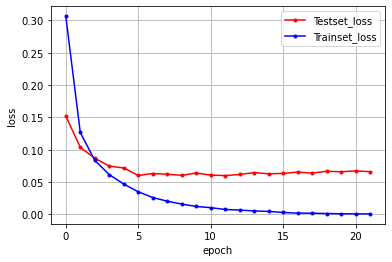

In [16]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()